In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv('airlines.csv')


CSV File had been successfully added to this .ipynb file.

In [13]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


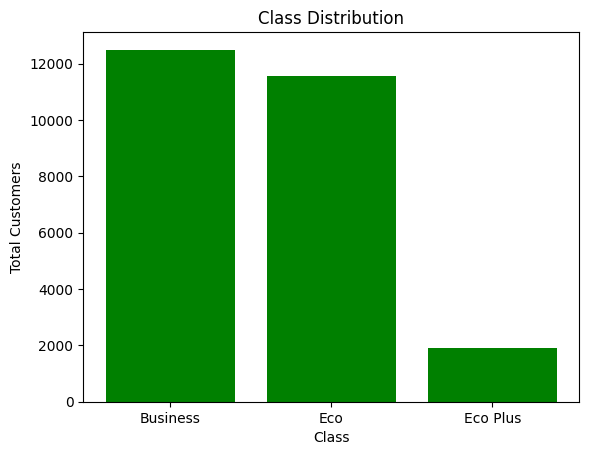

In [14]:
class_counts = df['Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, color='green')
plt.xlabel('Class')
plt.ylabel('Total Customers')
plt.title('Class Distribution')
plt.show()

The above bar graph shows the class distribution of the customers, where more than 12000 customers travel Business class, almost 12000 customers travel Eco class and around 2000 with the least amount travel in Eco Plus class.

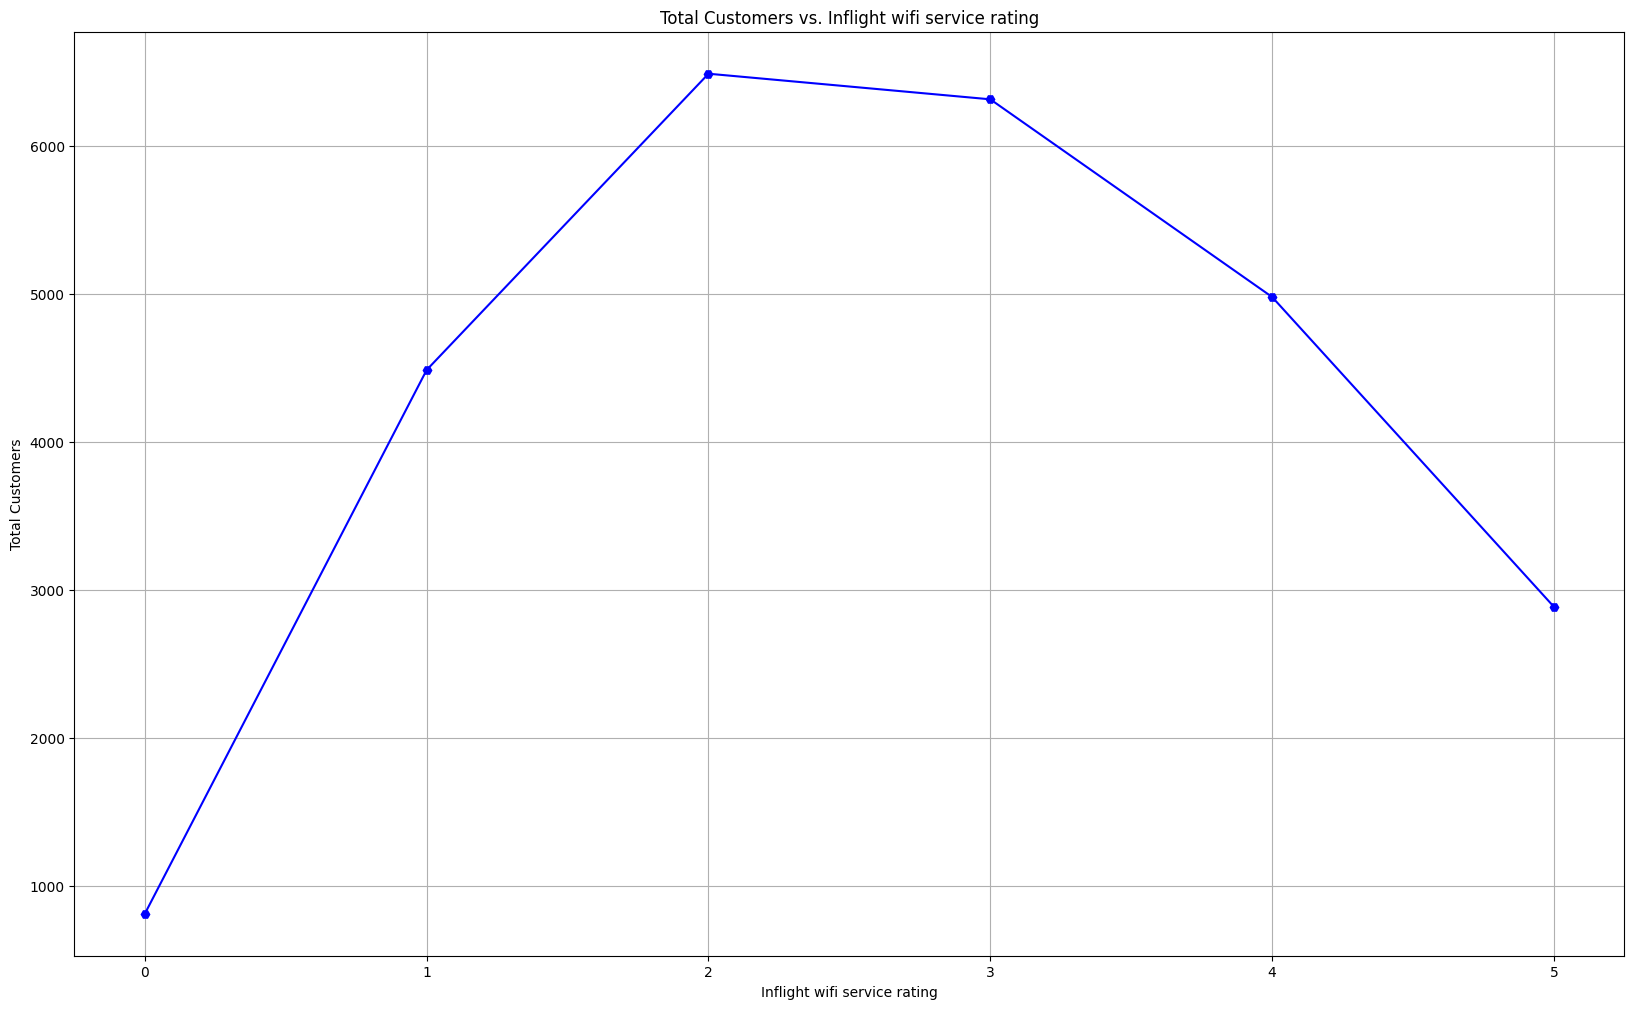

In [15]:
x_column = 'Inflight wifi service'
y_column = 'count'

grouped_data = df.groupby(x_column).size().reset_index(name=y_column)

plt.figure(figsize=(20, 12))
plt.plot(grouped_data[x_column], grouped_data[y_column], marker='H', color='b')
plt.xlabel('Inflight wifi service rating')
plt.ylabel("Total Customers")
plt.title(f'{"Total Customers"} vs. {"Inflight wifi service rating"}')
plt.grid(True)
plt.show()

The line graph indicates that a substantial number of customers provided ratings of 2 and 3 for inflight wifi service, suggesting an average experience. Fewer than 1000 customers rated it as 0, while around 4500 gave a rating of 1. Ratings of 4 were received from approximately 5000 customers, while nearly 3000 customers rated it as 5, indicating positive feedback for the service.

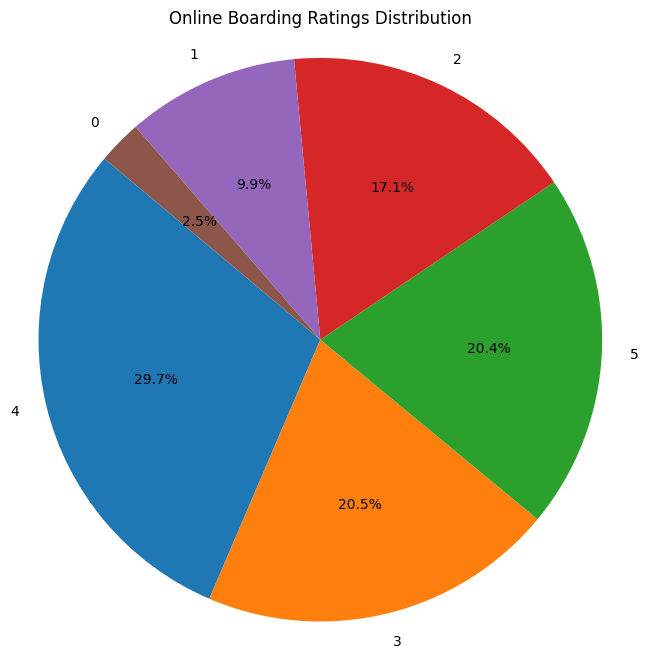

In [16]:
boarding_counts = df['Online boarding'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(boarding_counts, labels=boarding_counts.index, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
plt.title('Online Boarding Ratings Distribution')
plt.axis('equal')
plt.show()

The pie chart visualizes the distribution of online boarding ratings. The ratings range from 0 to 5, with corresponding percentages: 0-2.5%, 1-9.9%, 2-17.1%, 3-20.5%, 4-29.7%, and 5-20.4%. The chart highlights the dominance of the "4" rating, while other ratings have varying levels of representation, which means online boarding was a smooth experience for many but still has room for improvement.

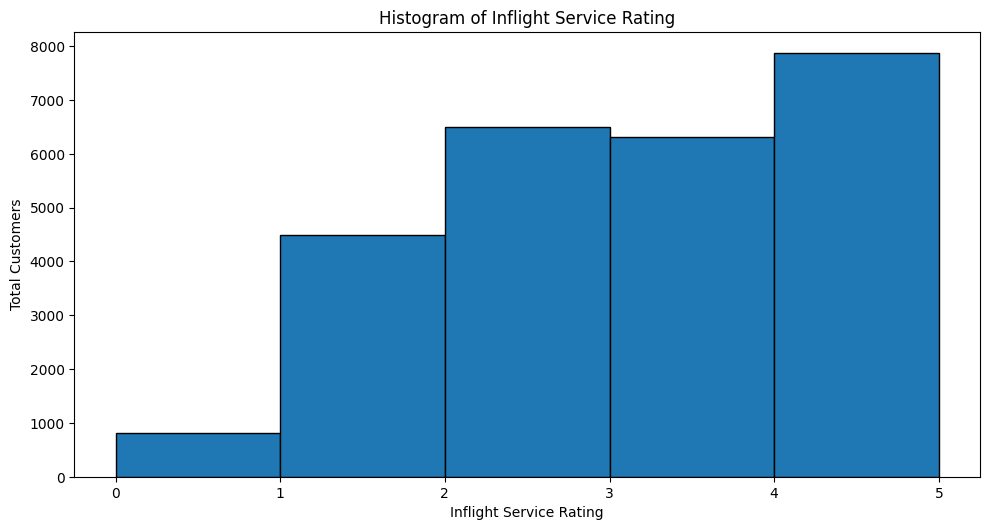

In [17]:
inflight_service = df['Inflight wifi service']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.hist(inflight_service, bins=5, edgecolor='black')
plt.title("Histogram of Inflight Service Rating")
plt.xlabel("Inflight Service Rating")
plt.ylabel("Total Customers")

plt.tight_layout()
plt.show()

The histogram illustrates the distribution of inflight service ratings provided by airline passengers. Approximately 1000 passengers rated the service with a score of 1, signifying dissatisfaction. Around 4500 passengers rated it as 2, indicating marginal satisfaction. Notably, 6500 passengers rated the service as 3, suggesting a moderate level of contentment. The fourth rating, 4, received responses from over 6000 passengers, reflecting a high level of satisfaction. Remarkably, nearly 8000 passengers awarded the highest rating of 5, demonstrating exceptional satisfaction with the inflight service.

In [18]:
sample_size = 18000
sample_data = df.sample(sample_size)

A sample data of 5000 was taken for the next analysis.

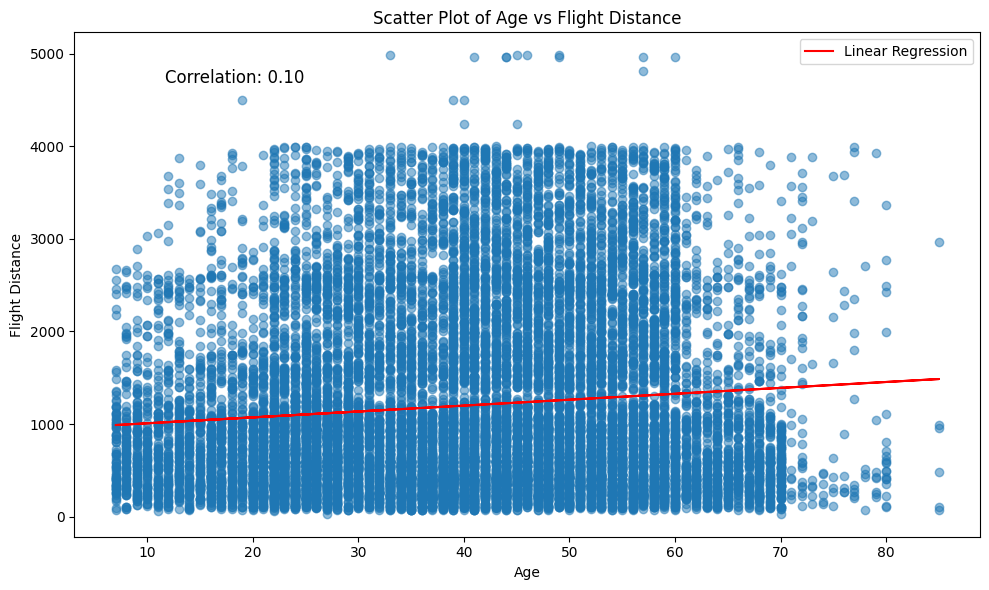

In [19]:
age = sample_data['Age']
flight_distance = sample_data['Flight Distance']

plt.figure(figsize=(10, 6))
plt.scatter(age, flight_distance, alpha=0.5)
plt.title("Scatter Plot of Age vs Flight Distance")
plt.xlabel("Age")
plt.ylabel("Flight Distance")

correlation_coefficient = age.corr(flight_distance)
plt.annotate(f'Correlation: {correlation_coefficient:.2f}', 
             xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

slope, intercept = np.polyfit(age, flight_distance, 1)
plt.plot(age, slope * age + intercept, color='red', label='Linear Regression')

plt.legend()
plt.tight_layout()
plt.show()

In the scatter plot of "Age" against "Flight Distance", it shows a slanted line that goes up a bit, and the correlation number is 0.10. This means that older passengers usually travel a bit farther, but it's not strong enough to say exactly how far someone will go based only on their age. The dots on the graph are spread out all around the line, showing that there's a lot of differences between people. So, while there's a small increase in travel distance as people get older, the weak connection between age and distance suggests that age is just one of many things that affect how far people travel.

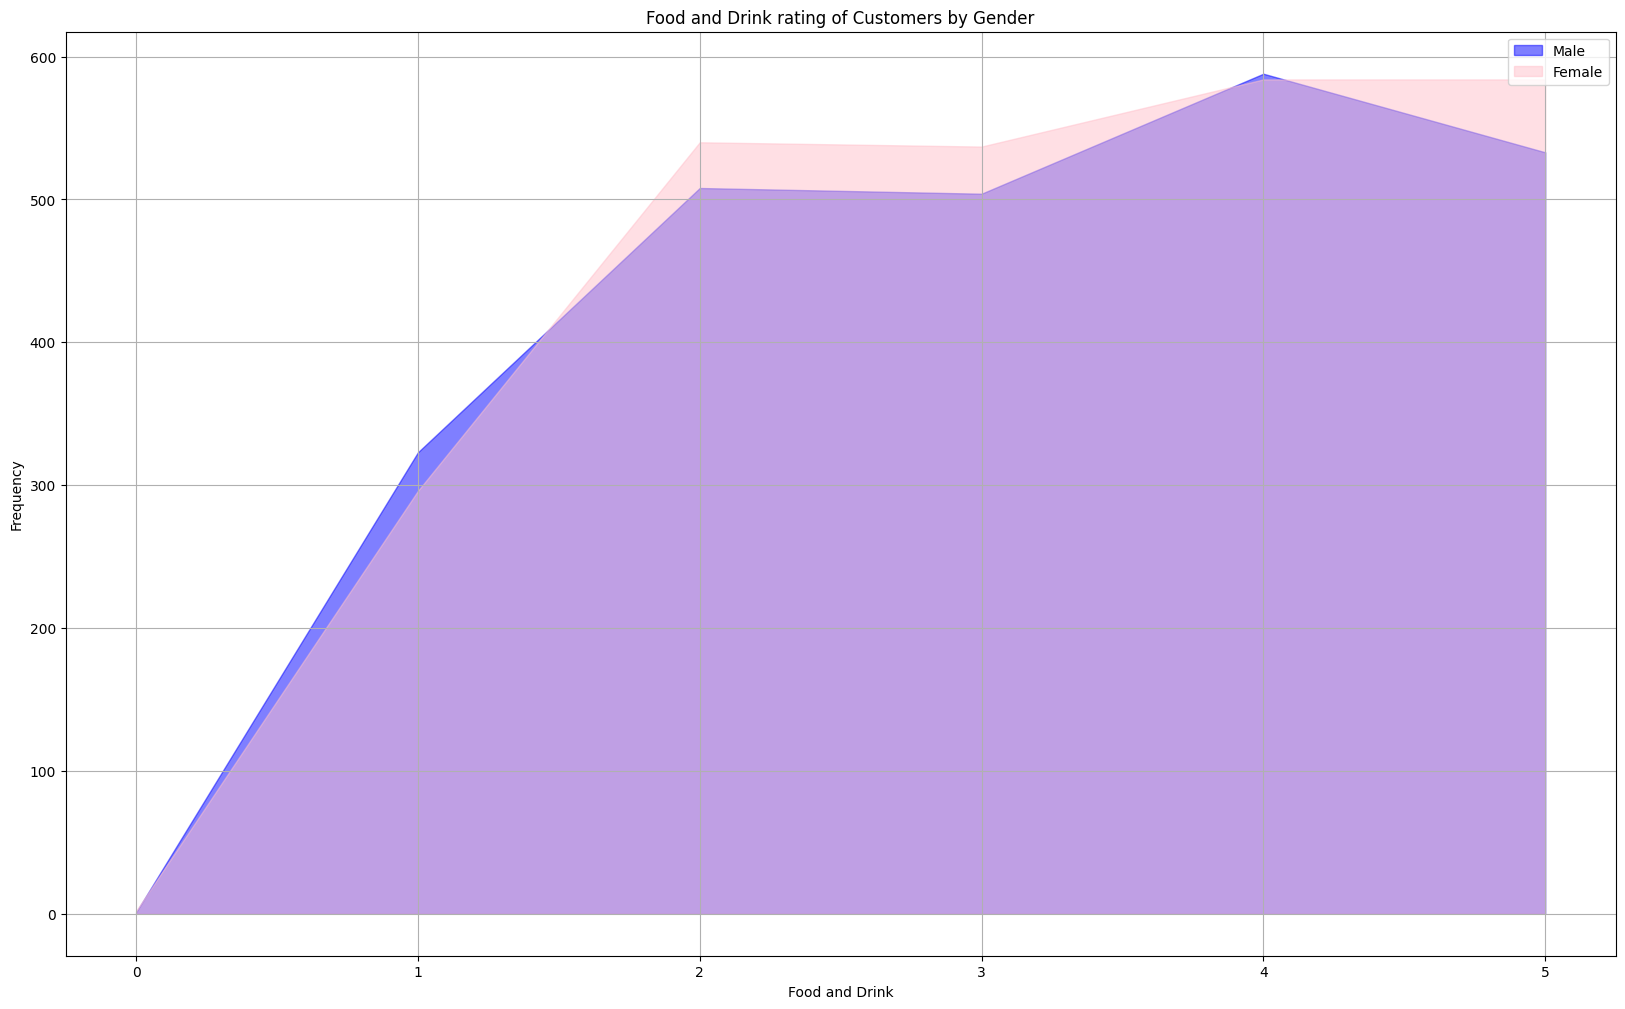

In [20]:
random_sample = df.sample(n=5000, random_state=42)
male_data = random_sample[random_sample['Gender'] == 'Male']
female_data = random_sample[random_sample['Gender'] == 'Female']
male_ratings = male_data['Food and drink'].value_counts().sort_index()
female_ratings = female_data['Food and drink'].value_counts().sort_index()
plt.figure(figsize=(20, 12))
plt.fill_between(male_ratings.index, male_ratings.values, color='Blue', alpha=0.5, label='Male')
plt.fill_between(female_ratings.index, female_ratings.values, color='Pink', alpha=0.5, label='Female')
plt.xlabel('Food and Drink')
plt.ylabel('Frequency')
plt.title('Food and Drink rating of Customers by Gender')
plt.legend()
plt.grid(True)
plt.show()

As shown by the above area graph, we can see that females were more satisfied with the food and drink in the flight than men, though the ratings given by women are higher by a slighter margin, still women were rather more satisfied.

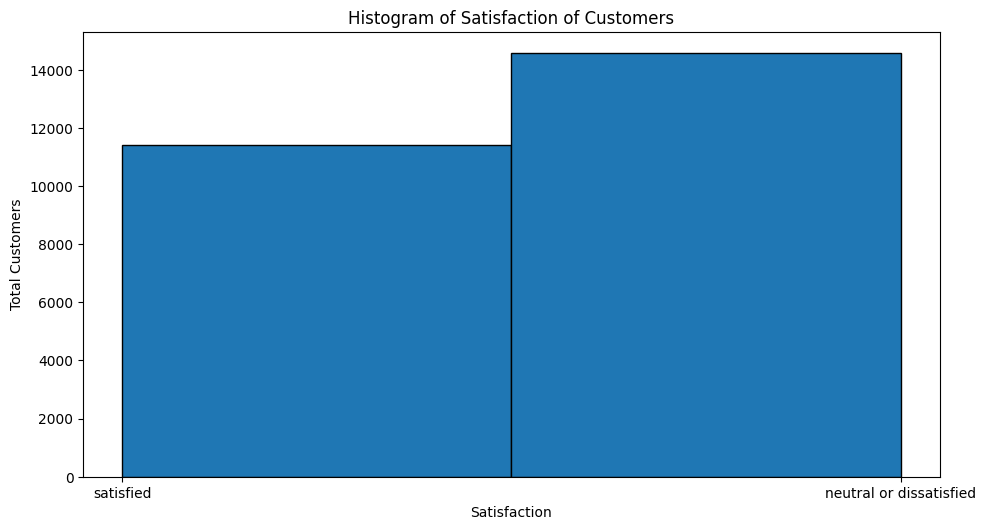

In [25]:
satisfaction = df['satisfaction']

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.hist(satisfaction, bins=2, edgecolor='black')
plt.title("Histogram of Satisfaction of Customers")
plt.xlabel("Satisfaction")
plt.ylabel("Total Customers")

plt.tight_layout()
plt.show()

If the average were to be taken, then the graph shows a 55-45 ratio of division of people dividing their vote upon them being satisfied with the overall service or not. Despite the debate, the overall satisfaction result happens to be below average so the airlines really need to pull their socks up as well as their quality of service in order to maintain good relation with customers and consistenct in delivery of quality service.

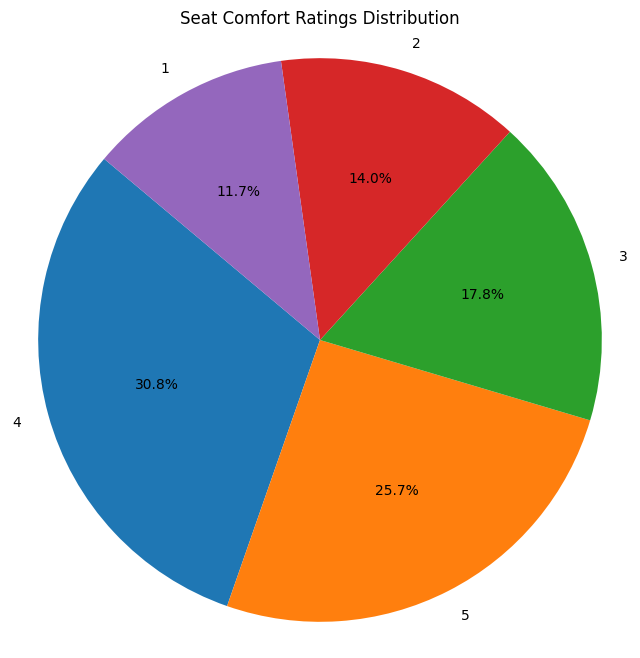

In [22]:
comfort_counts = df['Seat comfort'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(comfort_counts, labels=comfort_counts.index, autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=140)
plt.title('Seat Comfort Ratings Distribution')
plt.axis('equal')
plt.show()

The pie chart visualizes the distribution of seat comfort ratings. The ratings range from 1 to 5, with corresponding percentages: 1-11.7%, 2-14.0%, 3-17.8%, 4-30.8%, and 5-25.7%. The chart highlights the dominance of the "4" rating, while other ratings have varying levels of representation, which means seating in the flight was not much of a trouble for customers but still has room for improvement.

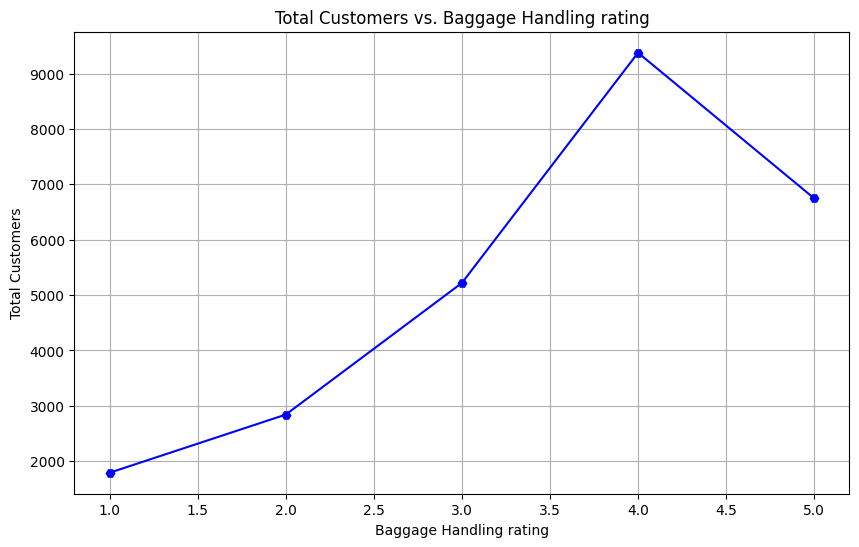

In [23]:
x_column = 'Baggage handling'
y_column = 'count'

grouped_data = df.groupby(x_column).size().reset_index(name=y_column)

plt.figure(figsize=(10, 6))
plt.plot(grouped_data[x_column], grouped_data[y_column], marker='H', color='b')
plt.xlabel('Baggage Handling rating')
plt.ylabel("Total Customers")
plt.title(f'{"Total Customers"} vs. {"Baggage Handling rating"}')
plt.grid(True)
plt.show()

According to the following line graph, the process of baggage handling seems to be done smoothly by the airlines as the rating provided by the custmers are mostly 4 and 5 rating with a few outliers at 1 rating given by less than 2000 people.